___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import numpy as np
%matplotlib inline
import pandas_datareader.data as web
import pandas as pd
import datetime
import seaborn as sns

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
BAC = web.DataReader('BAC','yahoo',start='2006-01-01',end='2016-01-01')

In [3]:
C = web.DataReader('C','yahoo',start='2006-01-01',end='2016-01-01')

In [4]:
GS = web.DataReader('GS','yahoo',start='2006-01-01',end='2016-01-01')

In [5]:
JPM = web.DataReader('JPM','yahoo',start='2006-01-01',end='2016-01-01')

In [6]:
MS = web.DataReader('MS','yahoo',start='2006-01-01',end='2016-01-01')

In [7]:
WFC= web.DataReader('WFC','yahoo',start='2006-01-01',end='2016-01-01')

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [9]:
bank_stocks = pd.concat(objs=[BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

** Set the column name levels (this is filled out for you):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364235  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009907  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052429  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002834  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024090  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  34.886642  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  34.910561  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.006302  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.042191  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.413147  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  19.975807  
2006-01-04   31.799999  31.530001  10870000.0  19.744110  
2006-01-05   31.500000  31.495001  10158000.0  19.722191  
2006-01-06   31.580000  31.680000   8403800.0  19.838036  
2006-01-09   31.674999  31.674999   5619600.0  19.834906  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [12]:
#we will build off of this
bank_stocks['BAC']['Close'].max()

54.900001525878906

In [13]:
#teacher way
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())
#Idk why it isn't working on WFC

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [14]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()

In [16]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iloc[0]

Bank Ticker
BAC     47.080002
C      492.899994
GS     128.869995
JPM     40.189999
MS      58.310001
WFC     31.900000
Name: 2006-01-03 00:00:00, dtype: float64

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [17]:
bank_stocks['WFC']['Close']

Date
2006-01-03    31.900000
2006-01-04    31.530001
2006-01-05    31.495001
2006-01-06    31.680000
2006-01-09    31.674999
                ...    
2015-12-24    54.820000
2015-12-28    54.680000
2015-12-29    55.290001
2015-12-30    54.889999
2015-12-31    54.360001
Name: Close, Length: 2517, dtype: float64

In [18]:
for tick in tickers:
    returns[tick+ ' Return'] = bank_stocks[tick]['Close'].pct_change()

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

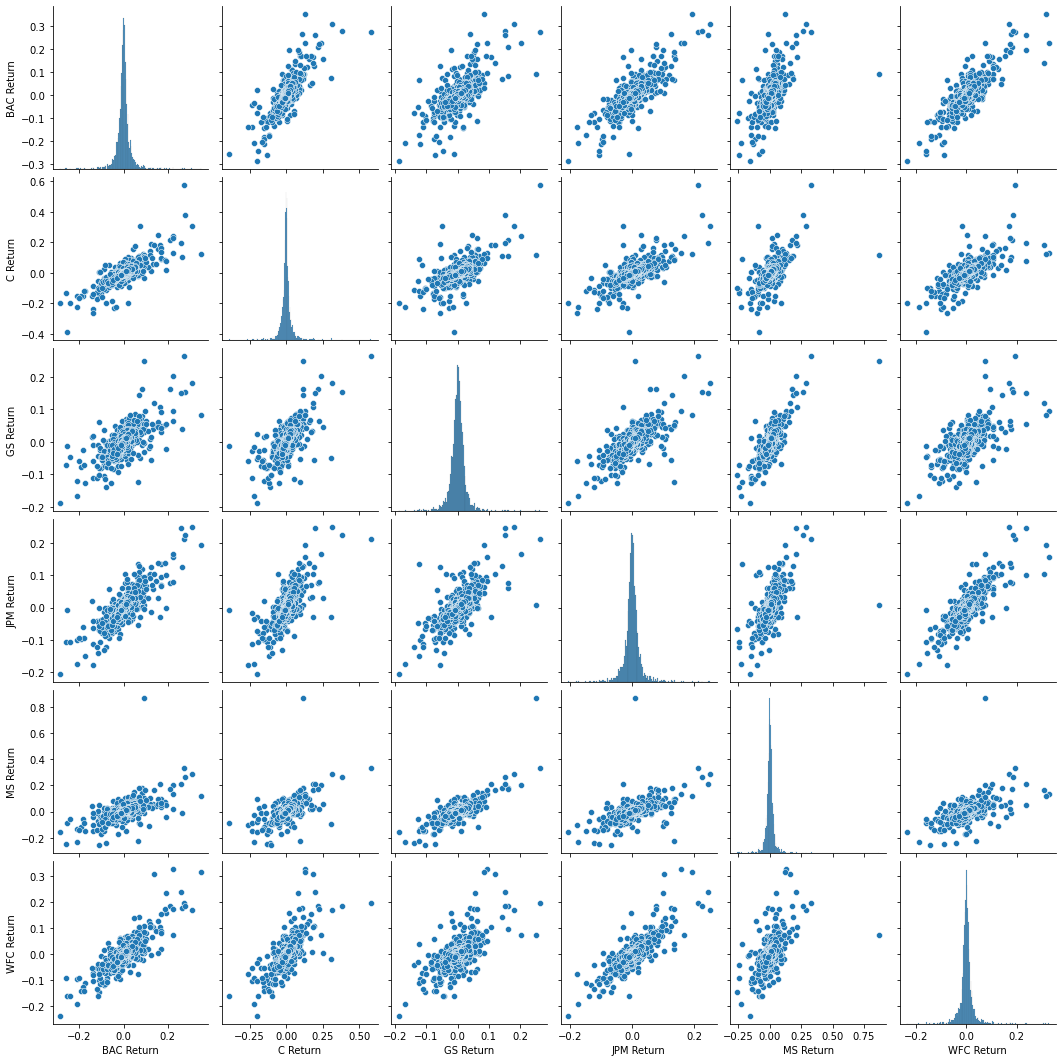

In [19]:
sns.pairplot(returns[1:])

In [20]:
#you can't get a percent return on the first day bc there is nothing to compare to.
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [21]:
returns['BAC Return'].max()

0.35269125610998264

In [22]:
ticker_returns = ['BAC Return','C Return','GS Return','JPM Return','MS Return','WFC Return']

In [23]:
for ticker in ticker_returns:
    print(ticker,returns[ticker].max())

BAC Return 0.35269125610998264
C Return 0.5782493049308048
GS Return 0.2646782298288137
JPM Return 0.25096732835180413
MS Return 0.8698346912026305
WFC Return 0.327645014059605


In [24]:
returns = returns.reset_index()

In [25]:
#I got it to work! Now let's plug in ticker
returns[returns['BAC Return']==returns['BAC Return'].max()]['Date']

822   2009-04-09
Name: Date, dtype: datetime64[ns]

In [26]:
#this is my answer!

for ticker in ticker_returns:
    print(ticker,returns[returns[ticker]==returns[ticker].min()]['Date'])

BAC Return 766   2009-01-20
Name: Date, dtype: datetime64[ns]
C Return 793   2009-02-27
Name: Date, dtype: datetime64[ns]
GS Return 766   2009-01-20
Name: Date, dtype: datetime64[ns]
JPM Return 766   2009-01-20
Name: Date, dtype: datetime64[ns]
MS Return 697   2008-10-09
Name: Date, dtype: datetime64[ns]
WFC Return 766   2009-01-20
Name: Date, dtype: datetime64[ns]


In [27]:
#for practice lets set the index

returns.set_index('Date', inplace=True)

In [28]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [29]:
#or do it all at once. 
#again would work if my index was date
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [30]:
#could also get the biggest single day gains
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [31]:
#let's reset our index so my solution works...
returns = returns.reset_index()

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

first inaguration of Barak Obama

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [32]:
#citi group is riskiest
returns.std()

Date          1054 days 09:18:32.314708160
BAC Return                        0.036647
C Return                          0.038672
GS Return                          0.02539
JPM Return                        0.027667
MS Return                         0.037819
WFC Return                        0.030238
dtype: object

In [33]:
type(returns['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
returns['year'] = pd.DatetimeIndex(returns['Date']).year


In [35]:
returns.head()

,Date,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return,year
0,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,2006
1,2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599,2006
2,2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110,2006
3,2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874,2006
4,2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158,2006


In [36]:
returns[returns['year']==2015].std()

Date          104 days 20:04:55.551720886
BAC Return                       0.016163
C Return                         0.015289
GS Return                        0.014046
JPM Return                       0.014017
MS Return                        0.016249
WFC Return                       0.012591
year                                  0.0
dtype: object

In [37]:
returns[returns['year']==2015]['MS Return']

2265   -0.002320
2266   -0.031258
2267   -0.028800
2268    0.014278
2269    0.014889
          ...   
2512   -0.003681
2513   -0.009544
2514    0.011812
2515   -0.009831
2516   -0.013031
Name: MS Return, Length: 252, dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\dansc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

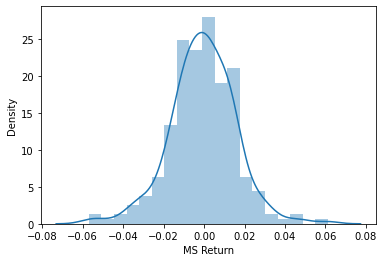

In [38]:
sns.distplot(returns[returns['year']==2015]['MS Return'])

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\dansc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

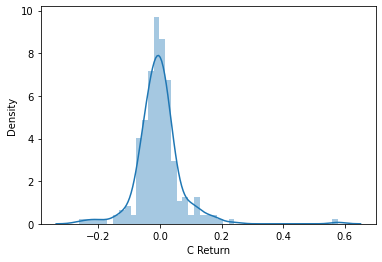

In [39]:
sns.distplot(returns[returns['year']==2008]['C Return'])

### teacher solutions

In [40]:
# teacher solutions
# set index to date again so his stuff works...
returns = returns.set_index('Date')

In [41]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return,year
Date,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,2006
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599,2006
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110,2006
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874,2006
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158,2006


In [42]:
#grab 2015
returns.loc['2015-01-01':'2015-12-31']

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return,year
Date,,,,,,,
2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189,2015
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422,2015
2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865,2015
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951,2015
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137,2015
...,...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997,2015
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554,2015
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156,2015


In [43]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
year          0.000000
dtype: float64

C:\Users\dansc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

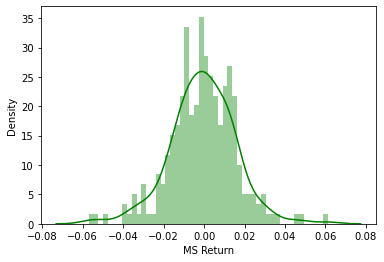

In [44]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',
             bins=50)

C:\Users\dansc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

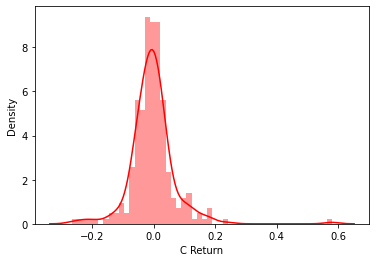

In [45]:
#more than 10 times as much. notice the decimal places
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',
             bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [47]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return,year
Date,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,2006
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599,2006
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110,2006
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874,2006
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158,2006


In [48]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364235  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009907  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052429  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002834  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024090  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  34.886642  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  34.910561  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.006302  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.042191  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.413147  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  19.975807  
2006-01-04   31.799999  31.530001  10870000.0  19.744110  
2006-01-05   31.500000  31.495001  10158000.0  19.722191  
2006-01-06   31.580000  31.680000   8403800.0  19.838036  
2006-01-09   31.674999  31.674999   5619600.0  19.834906  

[5 rows x 36 columns]

In [49]:
bank_stocks.index.names

FrozenList(['Date'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

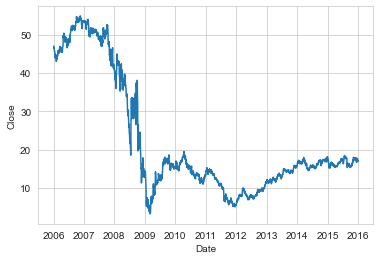

In [68]:
sns.lineplot(data=bank_stocks.xs(key='BAC',axis=1)['Close'])

In [51]:
#this is how you get it to work with one bank

<AxesSubplot:xlabel='Date', ylabel='Close'>

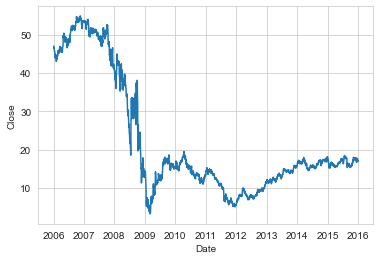

In [52]:
sns.lineplot(data=bank_stocks.xs(key='BAC',axis=1)['Close'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

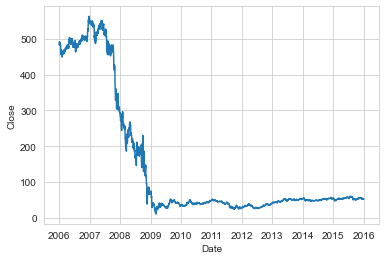

In [53]:
sns.lineplot(data=bank_stocks.xs(key='C',axis=1)['Close'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

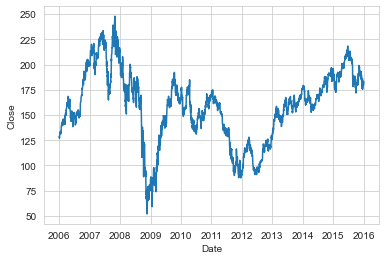

In [54]:
sns.lineplot(data=bank_stocks.xs(key='GS',axis=1)['Close'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

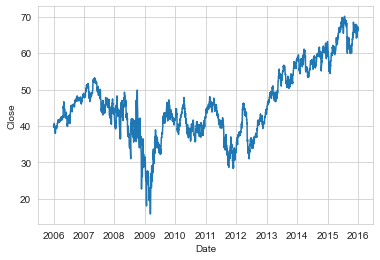

In [55]:
sns.lineplot(data=bank_stocks.xs(key='JPM',axis=1)['Close'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

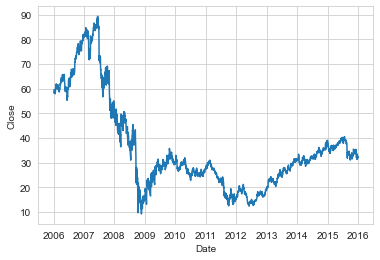

In [56]:
sns.lineplot(data=bank_stocks.xs(key='MS',axis=1)['Close'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

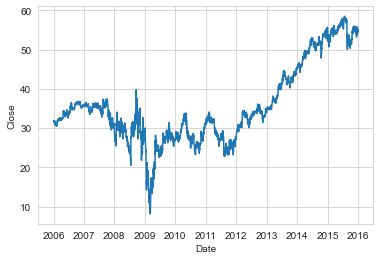

In [57]:
sns.lineplot(data=bank_stocks.xs(key='WFC',axis=1)['Close'])

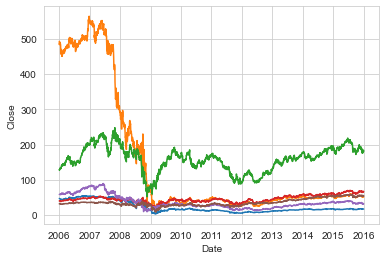

In [157]:
for tick in tickers:
    sns.lineplot(data=bank_stocks.xs(key=tick,axis=1)['Close'])

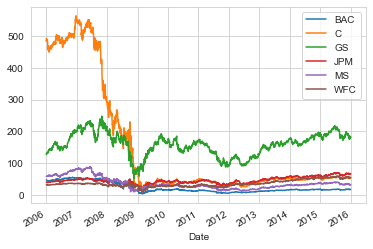

In [158]:
#teacher solution # 1
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

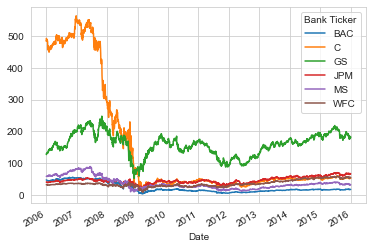

In [160]:
# teacher solution #2

bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [161]:
# teacher solution # 3

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [91]:
bank_stocks.loc['2008-01-01':'2008-12-31']

Bank Ticker        BAC                                                \
Stock Info        High        Low       Open      Close       Volume   
Date                                                                   
2008-01-02   41.549999  40.349998  41.529999  40.560001   30764600.0   
2008-01-03   40.810001  40.250000  40.630001  40.299999   22589500.0   
2008-01-04   40.290001  39.759998  40.000000  39.849998   34921700.0   
2008-01-07   40.240002  39.259998  40.049999  39.900002   31884400.0   
2008-01-08   40.209999  38.279999  40.180000  38.410000   42143300.0   
...                ...        ...        ...        ...          ...   
2008-12-24   13.560000  12.740000  12.750000  13.530000   38022300.0   
2008-12-26   13.800000  13.290000  13.660000  13.360000   43646200.0   
2008-12-29   13.730000  12.680000  13.570000  12.940000   62741300.0   
2008-12-30   13.240000  12.660000  13.090000  13.240000   72897800.0   
2008-12-31   14.120000  13.000000  13.090000  14.080000  113351000.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2008-01-02   31.498962  298.899994  288.500000  297.299988  289.200012  ...   
2008-01-03   31.297043  293.899994  288.899994  292.200012  289.299988  ...   
2008-01-04   30.947588  290.299988  280.399994  286.100006  282.399994  ...   
2008-01-07   30.986414  287.600006  279.299988  283.399994  282.600006  ...   
2008-01-08   29.829273  287.000000  270.100006  284.600006  271.399994  ...   
...                ...         ...         ...         ...         ...  ...   
2008-12-24   11.364019   68.000000   65.300003   65.500000   67.800003  ...   
2008-12-26   11.221231   70.300003   66.699997   68.400002   67.300003  ...   
2008-12-29   10.868473   68.500000   65.099998   68.300003   65.699997  ...   
2008-12-30   11.120445   68.199997   65.300003   66.599998   68.000000  ...   
2008-12-31   11.825972   70.400002   66.199997   67.199997   67.099998  ...   

Bank Ticker         MS                               WFC             \
Stock Info       Close      Volume  Adj Close       High        Low   
Date                                                                  
2008-01-02   50.950001  17624100.0  37.880894  30.480000  28.980000   
2008-01-03   50.939999  11422200.0  37.873444  29.370001  28.170000   
2008-01-04   49.299999  14448500.0  36.654110  28.320000  26.990000   
2008-01-07   48.310001  18767500.0  35.918060  28.040001  27.110001   
2008-01-08   46.400002  22467500.0  34.497990  28.110001  26.370001   
...                ...         ...        ...        ...        ...   
2008-12-24   14.500000   5255100.0  11.123742  27.680000  26.860001   
2008-12-26   14.650000   4467100.0  11.238817  27.860001  27.150000   
2008-12-29   14.900000  12024200.0  11.430605  27.910000  27.299999   
2008-12-30   15.190000  14039300.0  11.653082  28.799999  27.610001   
2008-12-31   16.040001  15006200.0  12.305161  30.490000  28.200001   

Bank Ticker                                               \
Stock Info        Open      Close      Volume  Adj Close   
Date                                                       
2008-01-02   30.480000  29.100000  24387800.0  19.457228   
2008-01-03   29.250000  28.520000  26313100.0  19.069422   
2008-01-04   28.250000  27.490000  50818700.0  18.380726   
2008-01-07   27.700001  27.680000  25887100.0  18.507774   
2008-01-08   27.870001  26.500000  41495200.0  17.718782   
...                ...        ...         ...        ...   
2008-12-24   27.299999  27.480000  11211400.0  19.138424   
2008-12-26   27.570000  27.510000  12384400.0  19.159311   
2008-12-29   27.889999  27.830000  20971000.0  19.382185   
2008-12-30   27.809999  28.799999  28636600.0  20.057724   
2008-12-31   28.690001  29.480000  45109700.0  20.531317   

Bank Ticker                                     

In [94]:
bank_stocks.loc['2008-01-01':'2008-12-31'].rolling(window=30).mean()

C:\Users\dansc\AppData\Local\Temp\ipykernel_9560\1493263607.py:1: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were MultiIndex([('rolling_av', '')],
           names=['Bank Ticker', 'Stock Info'])



Bank Ticker        BAC                                                 \
Stock Info        High        Low       Open      Close        Volume   
Date                                                                    
2008-01-02         NaN        NaN        NaN        NaN           NaN   
2008-01-03         NaN        NaN        NaN        NaN           NaN   
2008-01-04         NaN        NaN        NaN        NaN           NaN   
2008-01-07         NaN        NaN        NaN        NaN           NaN   
2008-01-08         NaN        NaN        NaN        NaN           NaN   
...                ...        ...        ...        ...           ...   
2008-12-24   15.541000  13.987000  14.891333  14.738667  1.266790e+08   
2008-12-26   15.373000  13.863333  14.735000  14.617333  1.247356e+08   
2008-12-29   15.250667  13.790000  14.615333  14.478667  1.202346e+08   
2008-12-30   15.090667  13.672000  14.490333  14.372667  1.185128e+08   
2008-12-31   15.018667  13.606000  14.386333  14.341000  1.179535e+08   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2008-01-02         NaN        NaN        NaN        NaN        NaN  ...   
2008-01-03         NaN        NaN        NaN        NaN        NaN  ...   
2008-01-04         NaN        NaN        NaN        NaN        NaN  ...   
2008-01-07         NaN        NaN        NaN        NaN        NaN  ...   
2008-01-08         NaN        NaN        NaN        NaN        NaN  ...   
...                ...        ...        ...        ...        ...  ...   
2008-12-24   12.251505  80.670000  69.976666  76.943334  74.416666  ...   
2008-12-26   12.160194  79.326667  69.026666  75.680000  73.446666  ...   
2008-12-29   12.054387  78.310000  68.440000  74.693334  72.486666  ...   
2008-12-30   11.975594  77.213334  67.686666  73.660000  71.580000  ...   
2008-12-31   11.958367  76.290001  66.976666  72.780000  70.853333  ...   

Bank Ticker         MS                                            WFC  \
Stock Info        Open      Close        Volume  Adj Close       High   
Date                                                                    
2008-01-02         NaN        NaN           NaN        NaN        NaN   
2008-01-03         NaN        NaN           NaN        NaN        NaN   
2008-01-04         NaN        NaN           NaN        NaN        NaN   
2008-01-07         NaN        NaN           NaN        NaN        NaN   
2008-01-08         NaN        NaN           NaN        NaN        NaN   
...                ...        ...           ...        ...        ...   
2008-12-24   13.542333  13.655333  3.564132e+07  10.475753  28.727000   
2008-12-26   13.584000  13.745667  3.464952e+07  10.545053  28.675000   
2008-12-29   13.668333  13.802000  3.311448e+07  10.588269  28.627333   
2008-12-30   13.746333  13.907333  3.241682e+07  10.669076  28.591000   
2008-12-31   13.863667  14.068000  3.194444e+07  10.792332  28.649667   

Bank Ticker                                                            
Stock Info         Low       Open      Close        Volume  Adj Close  
Date                                                                   
2008-01-02         NaN        NaN        NaN           NaN        NaN  
2008-01-03         NaN        NaN        NaN           NaN        NaN  
2008-01-04         NaN        NaN        NaN           NaN        NaN  
2008-01-07         NaN        NaN        NaN           NaN        NaN  
2008-01-08         NaN        NaN        NaN           NaN        NaN  
...                ...        ...        ...           ...        ...  
2008-12-24   26.113333  27.475000  27.531333  6.731091e+07  19.174170  
2008-12-26   26.108333  27.450000  27.538333  6.557604e+07  19.179045  
2008-12-29   26.160000  27.462667  27.496333  6.340816e+07  19.149794  
2008-12-30   26.159333  27.449667  27.4

In [84]:
sns.lineplot(

C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



ValueError: If using all scalar values, you must pass an index

In [95]:
#let's turn that into its own dataframe

In [119]:
rollingdf = bank_stocks.loc['2008-01-01':'2008-12-31'].rolling(window=30).mean()

C:\Users\dansc\AppData\Local\Temp\ipykernel_9560\2781976326.py:1: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were MultiIndex([('rolling_av', '')],
           names=['Bank Ticker', 'Stock Info'])



In [162]:
#let's zoom in on BAC and CLOSE
#for line in rollingdf.xs(key='BAC',axis=1)['Close']:
    #print(line)

In [147]:
plotthis = rollingdf.xs(key='BAC',axis=1)['Close']

In [139]:
bank_stocks['rolling']=rollingdf.xs(key='BAC',axis=1)['Close']

<AxesSubplot:xlabel='Date', ylabel='Close'>

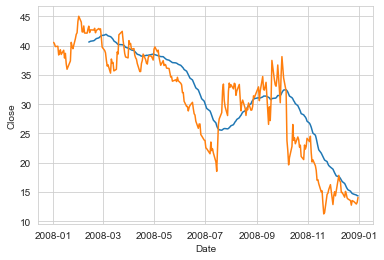

In [164]:
sns.lineplot(data=plotthis)
sns.lineplot(data=bank_stocks.loc['2008-01-01':'2008-12-31'].xs(key='BAC',axis=1)['Close'])

### Teacher solution

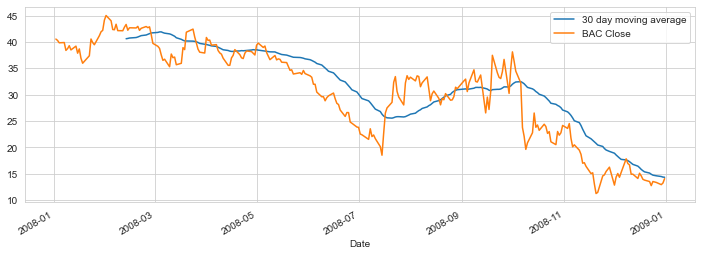

In [167]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day moving average')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [173]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364235  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009907  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052429  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002834  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024090  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                   WFC                                   \
Stock Info      Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2006-01-03   5377000.0  34.886642  31.975000  31.195000  31.600000  31.900000   
2006-01-04   7977800.0  34.910561  31.820000  31.365000  31.799999  31.530001   
2006-01-05   5778000.0  35.006302  31.555000  31.309999  31.500000  31.495001   
2006-01-06   6889800.0  35.042191  31.775000  31.385000  31.580000  31.680000   
2006-01-09   4144500.0  35.413147  31.825001  31.555000  31.674999  31.674999   

Bank Ticker                         \
Stock Info       Volume  Adj Close   
Date                                 
2006-01-03   11016400.0  19.975807   
2006-01-04   10870000.0  19.744110   
2006-01-05   10158000.0  19.722191   
2006-01-06    8403800.0  19.838036   
2006-01-09    5619600.0  19.834906   

Bank Ticker                                         rolling_av rolling  
Stock Info                                                              
Date                                                                    
2006-01-03   <bound method Rolling.mean of Rolling [window=...     NaN  
2006-01-04   <bound method Rolling.mean of Rolling [window=...     NaN  
2006-01-05   <bound method Rolling.mean of Rolling [window=...     NaN  
2006-01-06   <bound method Rolling.mean of Rolling [window=...     NaN  
2006-01-09   <bound method Rolling.mean of Rolling [window=...     NaN  

[5 rows x 38 columns]

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

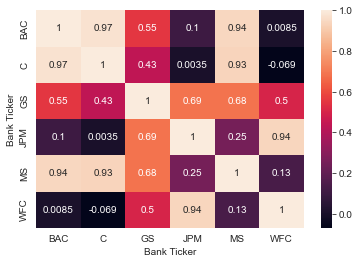

In [178]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)


** Optional: Use seaborn's clustermap to cluster the correlations together:**

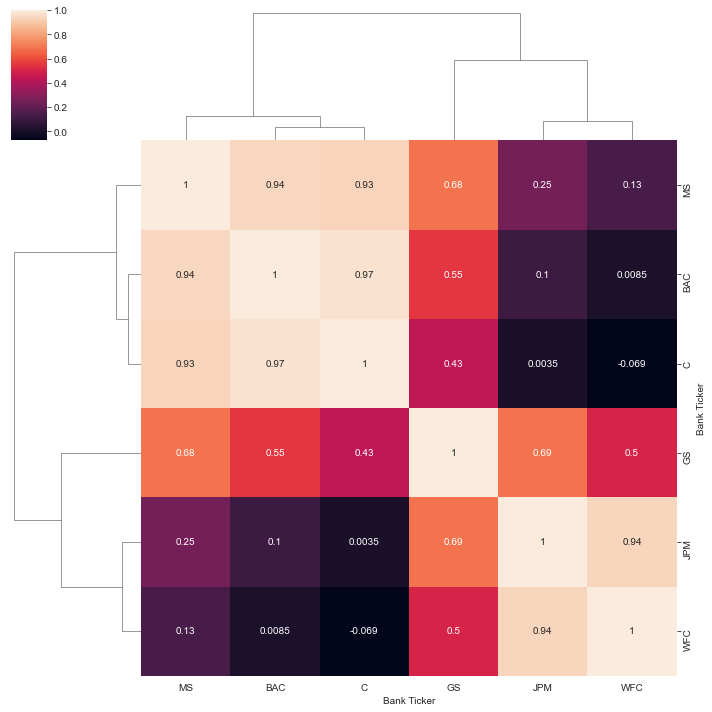

In [180]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)


In [181]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [183]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [186]:
bac15 = BAC[['Open','High','Low','Close']].ix['2015-01-01':'2016-01-01']
bac15.iplot()

AttributeError: 'DataFrame' object has no attribute 'ix'

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.